# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [179]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

'''Part 1: Creating a Financial Planner for Emergencies

First, let's start by using some functions and modules.
    1. Load the environment variables from the .env file using the 'load_dotenv()' function
    2. Hold the amount of crypto currency held using the variables 'btc_coins' and 'eth_coins'
    3. Hold the amount of monthly income in the 'monthly_income' variable
    4. Hold the endpoint url's in their respective variable 'btc_url' and 'eth_url'
    5. Make a API call using the 'requests.get' and '.json' functions 
    6. Hold the results in their own variables 'btc_response' and 'eth_response'
    7. Use the 'json.dumps' function to review the call and use the 'indent' and 'sort_keys' parameters to make the response object readable
    8. Hold the current price of bitcoin and etherium in 'btc_price' and 'eth_price' variable
    9. Calculate the value of the cryptocurrency the portfolio holds by multiplying the amount of crypto 'btc_coins/eth_coins' by the value of it 'btc_price/eth_price'
    10.Calculate the total value of the portfolio when it comes to the crypto currency portion by adding 'btc_value' and 'eth_value'
'''

In [180]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [181]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [182]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [183]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [184]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=3, sort_keys=True))


{
   "data": {
      "1": {
         "circulating_supply": 18766525,
         "id": 1,
         "last_updated": 1627248854,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 646992539442,
               "percent_change_1h": 0.316545871974974,
               "percent_change_24h": 1.72390663961559,
               "percent_change_7d": 9.43224870541165,
               "percentage_change_1h": 0.316545871974974,
               "percentage_change_24h": 1.72390663961559,
               "percentage_change_7d": 9.43224870541165,
               "price": 34568.0,
               "volume_24h": 19745985154
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18766525,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3108,
      "timestamp": 1627248854
   }
}


In [185]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))


{
   "data": {
      "1027": {
         "circulating_supply": 116840328,
         "id": 1027,
         "last_updated": 1627248895,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 251943756261,
               "percent_change_1h": 0.566732789115772,
               "percent_change_24h": 0.768307685321123,
               "percent_change_7d": 14.0958224729783,
               "percentage_change_1h": 0.566732789115772,
               "percentage_change_24h": 0.768307685321123,
               "percentage_change_7d": 14.0958224729783,
               "price": 2167.64,
               "volume_24h": 16354469543
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 116840328,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3108,
      "timestamp": 1627248895
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [186]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]


# Print the current price of BTC
print(f"The current price of BTC is ${btc_price: .2f}")


The current price of BTC is $ 34568.00


In [187]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of ETH is ${eth_price: .2f}")


The current price of ETH is $ 2167.64


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [188]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'Your current value of your BTC holding is ${btc_value: .2f}')


Your current value of your BTC holding is $ 41481.60


In [189]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'Your current value of the ETH your holding is ${eth_value: .2f}')


Your current value of the ETH your holding is $ 11488.49


In [190]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The total value of the cryptocurrency you hold is ${total_crypto_wallet: .2f}')


The total value of the cryptocurrency you hold is $ 52970.09


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [191]:
'''Part 2: Evaluate the Stock and Bond Holdings

Determine the current value of a member's stock and bond holdings.

Use functions to make an API call to determine the current value
    1. Hold the amount of shares in their respective variable 'spy_shares' and 'agg_shares'
    2. Set the Alpaca API/secret keys using the variables 'alpaca_api_key' and 'alpaca_secret_key' while using the 'os.getenv' function
    3. Create the alpaca object using the variable 'alpaca', the function 'tradeapi.Rest()' function, and the parameters 'alpaca_api_key, alpaca_secret_key, and api_version'
    4. Set the Alpaca API call parameters: 'tickers, time_frame, start_date, and end_date'
    5. Get the current closing prices and create a dataframe using the 'alpaca.get_barset' and '.df' functions
    6. Store the agg and spy closing prices using the 'agg_close_price' and 'spy_close_price' variables
    7. Calculate the value of each bond/stock by multiplying their share amount 'spy_shares/agg_share' and their closing price 'spy_close_price/agg_close_price'
    8. Calculate total value of the bond/stock portion by adding 'spy_value' and 'agg_value'
    9. Calculate the total value of the portfolio by adding 'total_stocks_bonds' and 'total_crypto_wallet'
'''

# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [192]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [193]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2021-07-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-19', tz='America/New_York').isoformat()




#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [194]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
closing_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Review the first 5 rows of the Alpaca DataFrame
closing_prices_df.head()
# confused on why it asks for 5 rows of data from the DataFrame if it asks to pull the data from just one day


AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-07-19 00:00:00-04:00  116.39  116.6085  116.35  116.52  6476334  426.19   

                                                                
                               high     low   close     volume  
time                                                            
2021-07-19 00:00:00-04:00  431.4089  421.97  424.97  127607115

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [195]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(closing_prices_df['AGG']['close'])

# Print the AGG closing price
print(f'The closing price of AGG is ${agg_close_price}')


The closing price of AGG is $116.52


In [196]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(closing_prices_df['SPY']['close'])

# Print the SPY closing price
print(f'The closing price of SPY is ${spy_close_price}')


The closing price of SPY is $424.97


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [197]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f'The current value of AGG is ${agg_value:.2f}')


The current value of AGG is $23304.00


In [198]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f'The current value of SPY is ${spy_value:.2f}')


The current value of SPY is $46746.70


In [199]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The current balance of the stock and bond in your portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond in your portfolio is $70050.70


In [200]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f'The total value of the portfolio is ${total_portfolio:.2f}')


The total value of the portfolio is $123020.79


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [201]:
'''Part 3: Evaluate the Emergency Fund

Determine if the member has enough savings to build a emergency fund

Use functions to determine if their is enough money and what to do next
    1. Create a list with the variable 'savings_data' and the parameters 'total_crypto_wallet' and 'total_stocks_bonds'
    2. Create a Dataframe using the 'portfolio' variable and the 'crypto'/'stock/bond' parameters
    3. Use the pd.DataFrame function and the 'savings_data, columns, index' parameters in the 'saving_df' variable
    4. Plot the data on a pie chart using the '.plot.pie' functions
    5. Create the 'emergency_fund_value' variable to hold '3 * monthly_income'
    6. Create 3 conditions using 'if, elif, and else' functions for
        1.If portfolio is more than the fund
        2.If portfolio is equal to the fund
        3.If portfolio is less than fund
'''

# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]


# Review the Python list savings_data
savings_data
    

[52970.092, 70050.70000000001]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [202]:
# Create a Pandas DataFrame called savings_df 
portfolio = ['crypto', 'stock/bond']

saving_df = pd.DataFrame(
    savings_data,
    columns=["amount"],
    index=portfolio
    )

# Display the savings_df DataFrame
saving_df


,amount
crypto,52970.092
stock/bond,70050.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"Total Value of member's portfolio"}, ylabel='amount'>

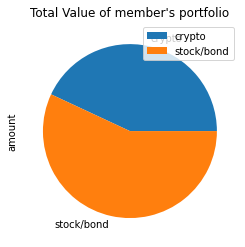

In [ ]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
saving_df.plot.pie(title="Total Value of member's portfolio", y='amount')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [204]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [205]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f'Congratulations on having enough money in this fund!')

elif total_portfolio == emergency_fund_value:
    print(f'Congratulations for reaching such an important financial goal!')

else:
    print(f'Your only ${emergency_fund_value - total_portfolio}')


Congratulations on having enough money in this fund!


### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [206]:
'''Part 4: Create a Monte Carlo Simulation

Use the 'MCForecastTools.py' to create a Monte Carlo Simulation
    1. Set start and end dates for 3 years using the 'pd.Timestamp' and '.isoformat' functions
    2. Set 'limit_rows' variable to hold the max amount of rows
    3. Use the 'alpaca.get_barset()' function and 'tickers, timeframe, start, and end' parameters to make the API call
    4. Configure the Monte Carlo to forecast 30 years of cumulative returns using 'portfolio_data, pricing_data_3_years_df, weights, num_simulation, and num_trading_days parameters'
    5. Run the Monte Carlo sim using 'MC_thirty_years.calc_cumulative_return()'
    6. Plot the data in overlay line plot using 'plot_simulation()' function
    7. Plot the distribution using 'plot_distribution()' function
    8. Show a summary statistic of the data using  'summarize_cumulative_return()' function
    '''

# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_3_years = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat
end_date_3_years = pd.Timestamp('2017-08-07', tz='America/New_York').isoformat

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

## Part 2: Create a Financial Planner for Retirement

In [207]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
pricing_data_3_years_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date_3_years,
    end=end_date_3_years,
    
).df


# Display both the first and last five rows of the DataFrame
display(pricing_data_3_years_df.head())
display(pricing_data_3_years_df.tail())

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2021-03-03 00:00:00-05:00  114.80  114.8300  114.60  114.710  9720752  385.79   
2021-03-04 00:00:00-05:00  114.79  114.8000  114.26  114.360  5239421  381.22   
2021-03-05 00:00:00-05:00  114.17  114.3197  114.05  114.285  6190988  380.46   
2021-03-08 00:00:00-05:00  114.20  114.2300  113.83  113.840  5213848  384.66   
2021-03-09 00:00:00-05:00  114.20  114.3100  114.00  114.250  5074245  385.85   

                                                                 
                             high       low    close     volume  
time                                                             
2021-03-03 00:00:00-05:00  386.83  381.3100  381.450  105013641  
2021-03-04 00:00:00-05:00  384.00  371.8800  376.730  168203161  
2021-03-05 00:00:00-05:00  384.76  372.6400  383.595  133661539  
2021-03-08 00:00:00-05:00  387.68  381.4200  381.740  107185328  
2021-03-09 00:00:00-05:00  389.91  381.7299  387.110   97898909

AGG                                        SPY  \
                              open      high     low   close   volume    open   
time                                                                            
2021-07-19 00:00:00-04:00  116.390  116.6085  116.35  116.52  6476334  426.19   
2021-07-20 00:00:00-04:00  116.780  116.8200  116.32  116.39  7229222  425.68   
2021-07-21 00:00:00-04:00  116.075  116.1500  115.92  116.02  7773071  432.34   
2021-07-22 00:00:00-04:00  116.030  116.3500  116.03  116.29  6269656  434.74   
2021-07-23 00:00:00-04:00  116.030  116.2200  116.03  116.21  4137100  437.53   

                                                                  
                               high       low   close     volume  
time                                                              
2021-07-19 00:00:00-04:00  431.4089  421.9700  424.97  127607115  
2021-07-20 00:00:00-04:00  432.4200  424.8300  431.04   87430308  
2021-07-21 00:00:00-04:00  434.7000  431.0111  434.56   54251351  
2021-07-22 00:00:00-04:00  435.7200  433.6900  435.50   41998182  
2021-07-23 00:00:00-04:00  440.3000  436.7900  439.90   53294703

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [208]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_years = MCSimulation(
    portfolio_data=pricing_data_3_years_df,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2021-03-03 00:00:00-05:00  114.80  114.8300  114.60  114.710  9720752   
2021-03-04 00:00:00-05:00  114.79  114.8000  114.26  114.360  5239421   
2021-03-05 00:00:00-05:00  114.17  114.3197  114.05  114.285  6190988   
2021-03-08 00:00:00-05:00  114.20  114.2300  113.83  113.840  5213848   
2021-03-09 00:00:00-05:00  114.20  114.3100  114.00  114.250  5074245   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2021-03-03 00:00:00-05:00          NaN  385.79  386.83  381.3100  381.450   
2021-03-04 00:00:00-05:00    -0.003051  381.22  384.00  371.8800  376.730   
2021-03-05 00:00:00-05:00    -0.000656  380.46  384.76  372.6400  383.595   
2021-03-08 00:00:00-05:00    -0.003894  384.66  387.68  381.4200  381.740   
2021-03-09 00:00:00-05:00     0.003602  385.85  389.91  381.7299  387.110   

                                                   
                              volume daily_return  
time                                               
2021-03-03 00:00:00-05:00  105013641          NaN  
2021-03-04 00:00:00-05:00  168203161    -0.012374  
2021-03-05 00:00:00-05:00  133661539     0.018223  
2021-03-08 00:00:00-05:00  107185328    -0.004836  
2021-03-09 00:00:00-05:00   97898909     0.014067

In [209]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996840,1.004055,1.005382,0.999060,0.996409,1.005481,1.007027,0.999717,1.000184,1.007420,...,0.998513,0.999228,0.997817,1.003995,0.998263,1.011795,1.001025,0.996625,0.997133,0.993489
2,1.002921,0.993076,1.011981,0.995790,0.996458,1.007082,1.008853,1.005131,1.010351,1.016762,...,0.999186,0.994625,1.003213,1.001838,0.994040,1.006229,0.999009,0.992005,1.000257,0.993774
3,1.003327,0.995001,1.013843,1.001923,0.992963,1.009885,1.014069,1.012236,1.003105,1.024995,...,1.002084,0.993262,1.004594,1.011416,0.988639,0.995444,0.998827,0.990641,1.003798,0.990366
4,1.002932,0.994975,1.014188,1.009578,0.992873,1.014585,1.022497,1.016865,1.009603,1.029246,...,1.003223,0.998697,1.003093,1.011935,0.994214,0.996437,1.007162,0.995306,1.009360,0.986871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,744.131217,1018.045400,1234.743401,1106.294780,823.489146,2976.419816,1965.941214,1521.169588,842.499055,578.068765,...,1290.077692,905.649347,874.113672,1272.613853,1586.004056,2063.268751,958.033020,965.024601,965.306951,1279.449542
7557,748.152768,1018.236465,1241.856787,1097.555336,827.804733,2969.453503,1966.602642,1516.067181,843.242533,576.540818,...,1287.276035,897.694906,876.393861,1289.231306,1588.495065,2082.142585,959.753563,966.897490,977.014007,1277.342299
7558,741.812649,1028.179707,1238.490834,1094.125166,830.908322,2941.245951,1993.440336,1514.848449,847.100317,583.405316,...,1288.079524,900.072990,877.364871,1294.191426,1589.192396,2073.410112,959.437635,969.529938,975.508903,1265.246765
7559,743.782521,1033.435838,1236.095466,1099.303169,838.315712,2950.791725,2005.261488,1515.801610,854.089947,588.878774,...,1291.754259,895.275010,876.409877,1295.667745,1581.705313,2091.912166,961.459669,972.962962,978.857291,1266.547142


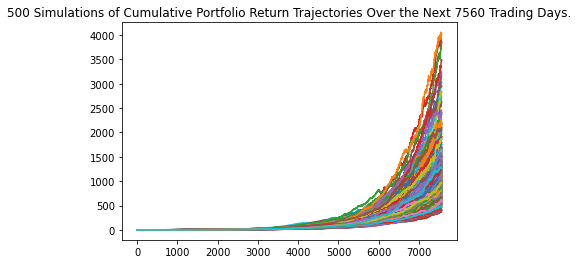

In [210]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirty_years_line_plot = MC_thirty_years.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

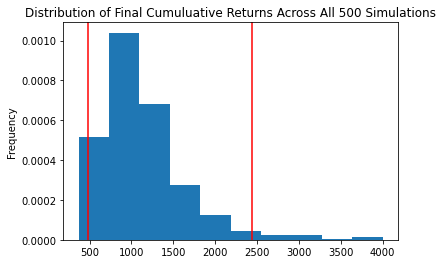

In [211]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirty_years_distribution_plot = MC_thirty_years.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_thirty_years_summary_table = MC_thirty_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_thirty_years_summary_table)

count            500.000000
mean            1138.780377
std              525.308725
min              368.395527
25%              809.426512
50%             1008.985560
75%             1318.470347
max             4004.220637
95% CI Lower     485.960104
95% CI Upper    2435.227203
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
'''Part 5: Analyze the Retirement Portfolio Forecasts

Generate a Monte Carlo sim using the current value of stock and bond portion
    1. Determine the lower and upper 95% confidence intervals using 'round' function and multiplying the 95% lower and upper value [8][9] by the value of the stock and bond portion of the portfolio
'''

# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond portion of the portfolio is $70050.70


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_thirty_years_summary_table[8]*70050.70)
ci_upper_thirty_cumulative_return = round(MC_thirty_years_summary_table[9]*70050.70)

# Print the result of your calculations
print(f"There is a 95% chance that the stock and bonds portfolio, with a 40/60 split between AGG and SPY over the next 30 years will end within a range of "
      f'${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.')


There is a 95% chance that the stock and bonds portfolio, with a 40/60 split between AGG and SPY over the next 30 years will end within a range of $34041845 and $170589370.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [215]:
'''Part 6:Forecast Cumulative Returns for 10 years

Adjust the Monte Carlo simulation to figure out if the member can retire early
    1. Configure the Monte Carlo simulation to forecast 10 years using 'MCSimulation' function and the 'portfolio_data, weights, num_simulation, and num_trading_days' parameters
    2. Run the simulation using '.calc_cumulative_return()' function
    3. Plot the data on a overlay line using the 'plot_simulation()' function
    4. Plot the distribution using the 'plot_distribution()' function
    5. Generate the summary statistic using the '.summarize_cumulative_return()' function
    6. Determine the lower and upper 95% confidence intervals using 'round' function and multiplying the 95% lower and upper value [8][9] by the value of the stock and bond portion of the portfolio

'''

# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_years = MCSimulation(
    portfolio_data=pricing_data_3_years_df,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
MC_ten_years.portfolio_data.head()


AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2021-03-03 00:00:00-05:00  114.80  114.8300  114.60  114.710  9720752   
2021-03-04 00:00:00-05:00  114.79  114.8000  114.26  114.360  5239421   
2021-03-05 00:00:00-05:00  114.17  114.3197  114.05  114.285  6190988   
2021-03-08 00:00:00-05:00  114.20  114.2300  113.83  113.840  5213848   
2021-03-09 00:00:00-05:00  114.20  114.3100  114.00  114.250  5074245   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2021-03-03 00:00:00-05:00          NaN  385.79  386.83  381.3100  381.450   
2021-03-04 00:00:00-05:00    -0.003051  381.22  384.00  371.8800  376.730   
2021-03-05 00:00:00-05:00    -0.000656  380.46  384.76  372.6400  383.595   
2021-03-08 00:00:00-05:00    -0.003894  384.66  387.68  381.4200  381.740   
2021-03-09 00:00:00-05:00     0.003602  385.85  389.91  381.7299  387.110   

                                                   
                              volume daily_return  
time                                               
2021-03-03 00:00:00-05:00  105013641          NaN  
2021-03-04 00:00:00-05:00  168203161    -0.012374  
2021-03-05 00:00:00-05:00  133661539     0.018223  
2021-03-08 00:00:00-05:00  107185328    -0.004836  
2021-03-09 00:00:00-05:00   97898909     0.014067

In [216]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995720,0.994824,1.005227,1.001859,1.003141,0.997336,0.999672,1.001562,0.993026,1.002646,...,1.001778,1.000252,0.999589,1.000404,1.007436,0.987024,1.003331,0.996028,0.998793,1.003373
2,0.989301,0.996734,1.006291,1.003950,1.006951,0.995458,0.996993,1.000206,0.981601,1.014279,...,1.006510,0.993721,1.002204,0.993752,1.009238,0.994575,1.018521,0.991291,1.001845,0.991251
3,0.997848,1.003522,1.005867,1.001769,1.004981,1.000132,0.998844,1.015151,0.984018,1.009863,...,1.001202,0.985241,1.009191,0.998994,1.006961,0.996757,1.021195,0.990645,0.996981,0.994135
4,0.995643,1.003317,1.003455,1.003960,1.002200,0.994506,1.000256,1.026911,0.990248,1.013822,...,1.002564,0.993907,1.011798,0.998474,1.018701,1.003914,1.019342,0.979465,0.986420,1.001325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,38.861201,13.383445,16.991543,18.211408,20.271791,18.643357,27.819172,16.467720,23.358584,17.329873,...,16.501769,15.979046,15.458267,23.395340,23.287567,24.097627,21.620805,23.354048,28.013759,17.577871
2517,38.718758,13.247816,17.075422,18.080891,20.261084,18.713227,27.967979,16.487183,23.260511,17.324784,...,16.378117,16.035278,15.473024,23.621013,23.505630,24.481123,21.451223,23.446530,28.148590,17.667932
2518,38.474586,13.223828,17.273627,18.121604,20.404250,18.846868,28.332054,16.506079,23.529051,17.355554,...,16.449504,16.266263,15.493329,23.696796,23.760903,24.469304,21.327216,23.364308,27.871414,17.595622
2519,38.275732,13.210056,17.286434,18.169246,20.462540,19.041849,28.398816,16.513742,23.633192,17.560395,...,16.485225,16.274165,15.578312,23.521259,23.963571,24.392012,21.456789,23.410044,27.925368,17.594124


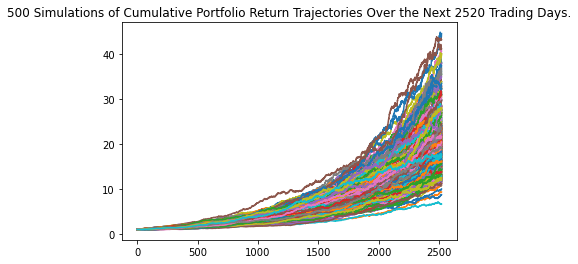

In [217]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_years_line_plot = MC_ten_years.plot_simulation()


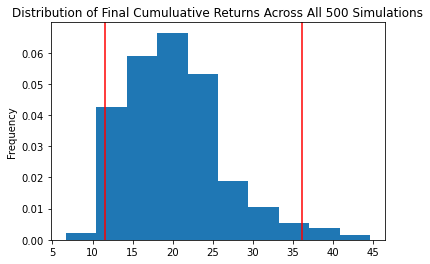

In [218]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_years_distribution_plot = MC_ten_years.plot_distribution()


In [219]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_years_summary_table = MC_ten_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_ten_years_summary_table)

count           500.000000
mean             20.204117
std               6.177484
min               6.669701
25%              15.661062
50%              19.386670
75%              23.490907
max              44.612951
95% CI Lower     11.600104
95% CI Upper     36.105944
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval? 



In [220]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond portion of the portfolio is $70050.70


In [221]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_ten_years_summary_table[8]*70050.70)
ci_upper_ten_cumulative_return = round(MC_ten_years_summary_table[9]*70050.70)

# Print the result of your calculations
print(f"There is a 95% chance that the stock and bonds portfolio, with a 20/80 split between AGG and SPY over the next 10 years will end within a range of "
      f'${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.')


There is a 95% chance that the stock and bonds portfolio, with a 20/80 split between AGG and SPY over the next 10 years will end within a range of $812595 and $2529247.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?